In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ran_gen = np.random.default_rng(42)

In [7]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


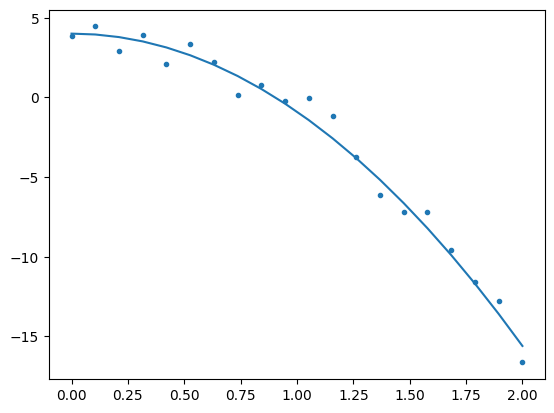

In [3]:
def eq_of_projectile(h0,t,u):
    g = 9.8
    return h0 + u*t - 0.5 * g * t**2


t = np.linspace(0, 2, 20)
h0,u = 4,0

y_true = eq_of_projectile(h0,t,u)
y_data = y_true + np.random.randn(len(t))/1.5
#np.save('y_data.npy',y_data)

plt.plot(t,y_true)
plt.scatter(t, y_data, marker=".")

In [4]:
np.save('y_data.npy',y_data)

In [5]:
y_data = np.load('y_data.npy')

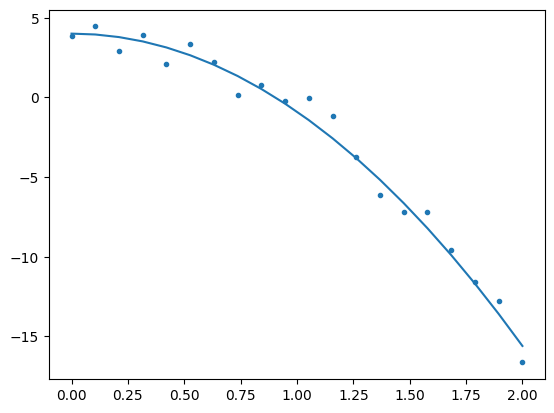

In [6]:
plt.plot(t,y_true)
plt.scatter(t, y_data, marker=".")